# Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Dataset

In [37]:
train_df = pd.read_csv("/content/drive/My Drive/P1: Twitter Sentiment Analysis/train.txt")
train_df.head()

,tweet_id,sentiment,tweet_text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...


In [38]:
test_df = pd.read_csv("/content/drive/My Drive/P1: Twitter Sentiment Analysis/test_samples.txt")
test_df.head()

,tweet_id,tweet_text
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,"Excuse the connectivity of this live stream, f..."


In [39]:
def con_sen_to_rat(sentiment):
    if(sentiment == "positive"):
        return 1
    elif(sentiment == "negative"):
        return -1
    else:
        return 0

In [40]:
train_df['sentiment'] = train_df['sentiment'].apply(con_sen_to_rat)
train_df.head()

,tweet_id,sentiment,tweet_text
0,264183816548130816,1,Gas by my house hit $3.39!!!! I\u2019m going t...
1,263405084770172928,-1,Theo Walcott is still shit\u002c watch Rafa an...
2,262163168678248449,-1,its not that I\u2019m a GSP fan\u002c i just h...
3,264249301910310912,-1,Iranian general says Israel\u2019s Iron Dome c...
4,262682041215234048,0,Tehran\u002c Mon Amour: Obama Tried to Establi...


In [41]:
test_df['sentiment'] = 0
test_df.head()

,tweet_id,tweet_text,sentiment
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor...",0
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...,0
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,0
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...",0
4,171874368908050432,"Excuse the connectivity of this live stream, f...",0


In [42]:
df = pd.concat((train_df, test_df), sort = True)
df.head()

,sentiment,tweet_id,tweet_text
0,1,264183816548130816,Gas by my house hit $3.39!!!! I\u2019m going t...
1,-1,263405084770172928,Theo Walcott is still shit\u002c watch Rafa an...
2,-1,262163168678248449,its not that I\u2019m a GSP fan\u002c i just h...
3,-1,264249301910310912,Iranian general says Israel\u2019s Iron Dome c...
4,0,262682041215234048,Tehran\u002c Mon Amour: Obama Tried to Establi...


# Data Pre-processing

In [43]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
def message_cleaning(message):
    mes_w_o_pun = re.sub("[^a-zA-z]", " ", message)
    remove_stopwords = [ lemmatizer.lemmatize(word) for word in mes_w_o_pun.split() if word.lower() not in set(stopwords.words("english"))   ]
    return remove_stopwords

# Convert Text into vectors

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer = message_cleaning)
df_cv = cv.fit_transform(df['tweet_text'])

In [46]:
print(df_cv.shape)

(26863, 60379)


# Splitting Dataset

In [47]:
X_train = df_cv[:21465]
X_test = df_cv[21465:]

In [48]:
y_train = df['sentiment'][:21465]

# Model Training

In [49]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100), max_iter=500, alpha=0.0001,
                     solver='adam', verbose=10,  random_state=101,tol=0.00000000001, early_stopping = True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.91108934
Validation score: 0.612483
Iteration 2, loss = 0.44108934
Validation score: 0.601304
Iteration 3, loss = 0.12329470
Validation score: 0.591989
Iteration 4, loss = 0.03908401
Validation score: 0.590592
Iteration 5, loss = 0.01986249
Validation score: 0.588728
Iteration 6, loss = 0.00993700
Validation score: 0.590592
Iteration 7, loss = 0.00798216
Validation score: 0.590592
Iteration 8, loss = 0.00439125
Validation score: 0.581276
Iteration 9, loss = 0.00421718
Validation score: 0.578947
Iteration 10, loss = 0.00357183
Validation score: 0.588263
Iteration 11, loss = 0.00322332
Validation score: 0.586865
Iteration 12, loss = 0.00258248
Validation score: 0.585002
Validation score did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=101, shuffle=True, solver='adam',
              tol=1e-11, validation_fraction=0.1, verbose=10, warm_start=False)

# Model Prediction

In [50]:
y_predict_test = mlp.predict(X_test)

In [51]:
test_df['sentiment'] = y_predict_test

In [52]:
test_df.head()

,tweet_id,tweet_text,sentiment
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor...",0
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...,1
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,0
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...",-1
4,171874368908050432,"Excuse the connectivity of this live stream, f...",0


In [53]:
def con_rat_to_sen(rating):
    if(rating == 1):
        return "positive"
    elif(rating == -1):
        return "negative"
    else:
        return "neutral"

In [54]:
test_df['sentiment'] = test_df['sentiment'].apply(con_rat_to_sen)

# Model Visualization

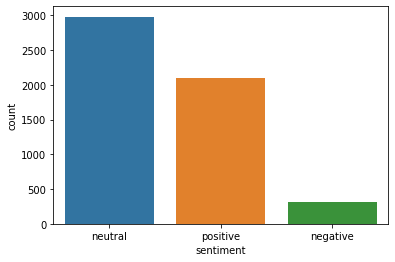

In [55]:
sns.countplot(data = test_df, x = "sentiment")

In [56]:
test_df.sentiment.describe()

count        5398
unique          3
top       neutral
freq         2981
Name: sentiment, dtype: object

In [57]:
test_list = []
heading = ['tweet_id', 'sentiment']
test_list.append(heading)
for i in range(len(test_df['tweet_id'])):
    sub = []
    sub.append(test_df['tweet_id'][i])
    sub.append(test_df['sentiment'][i])
    test_list.append(sub)

In [58]:
len(test_list)

5399

In [59]:
test_df.sentiment.describe()

count        5398
unique          3
top       neutral
freq         2981
Name: sentiment, dtype: object

# Generate Submission File

In [27]:
import csv

In [60]:
with open('/content/drive/My Drive/P1: Twitter Sentiment Analysis/Models/mlp2.csv', 'w', newline='') as fp:
    a = csv.writer(fp, delimiter = ",")
    data = test_list
    a.writerows(data)

In [61]:
check = pd.read_csv("/content/drive/My Drive/P1: Twitter Sentiment Analysis/Models/mlp2.csv")

In [62]:
check.head()

,tweet_id,sentiment
0,264238274963451904,neutral
1,218775148495515649,positive
2,258965201766998017,neutral
3,262926411352903682,negative
4,171874368908050432,neutral


## Testing Accuracy = 62.78%